## Linear Regression

Below is an example of creating a linear regression model. 

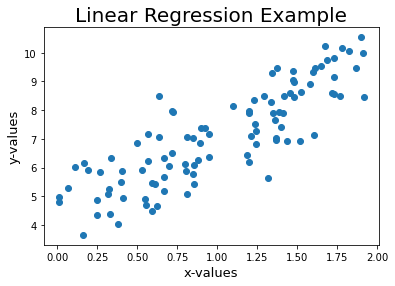

In [123]:
# Create linear looking data

import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
plt.title("Linear Regression Example", fontsize = 20)
plt.xlabel("x-values", fontsize = 13)
plt.ylabel("y-values", fontsize = 13)
plt.scatter(X, y, marker = "o")
plt.show()

 Let compute tetha using the Normal equation. 
 Use inv() from numpy to compute the inverse of a matrix and the dot() for matrix multiplication. 

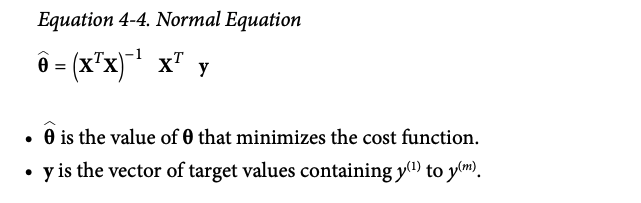

In [42]:
X_b = np.c_[np.ones((100, 1)),X] # Added x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
theta_best

array([[3.95907677],
       [3.05417784]])

This is a pretty good model given that the data we used to generate the data was y = 4 + 3x + noise

Now that we have the model, we can make predictions using theta vector

In [43]:
# We create a new X vector with different values for the feature vars

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.95907677],
       [10.06743244]])

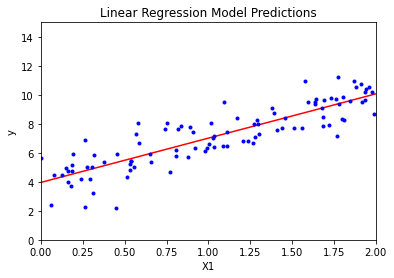

In [44]:
# Let's plot this model's predictions given set of x-values.

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel("X1")
plt.ylabel("y")
plt.title("Linear Regression Model Predictions")
plt.show()



Performing Linear Regression using Scikit-Learn --not numpy-- is quite easy (see below)

In [45]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_


(array([3.95907677]), array([[3.05417784]]))

In [46]:
# Now use the parameter you got from model to make prediction!

lin_reg.predict(X_new)

array([[ 3.95907677],
       [10.06743244]])

The sklearn method to create linear regression model is actually better becuase it uses SVD instead of noraml equation. The benefit is that there is a lower computational complexity value and you can handle more edge cases.

Now, we'll look at a differnt way to train a linear regression model --better suited for cases where there are a lot of features and/or too many training instances to fit into memory! -> Gradient Descent

## Gradient Descent

Grad descent is a general optimaization algo that finds optimal solution to a wide reange of problems --basically tweaks parameters iteratively to minimize a cost function. 

You start by filling theta with random values --called random initialization-- then you improve it gradually, taking one baby step at a time --each step decreasing the cost function (e.g., the MSE) until the algo converges to a minimum.

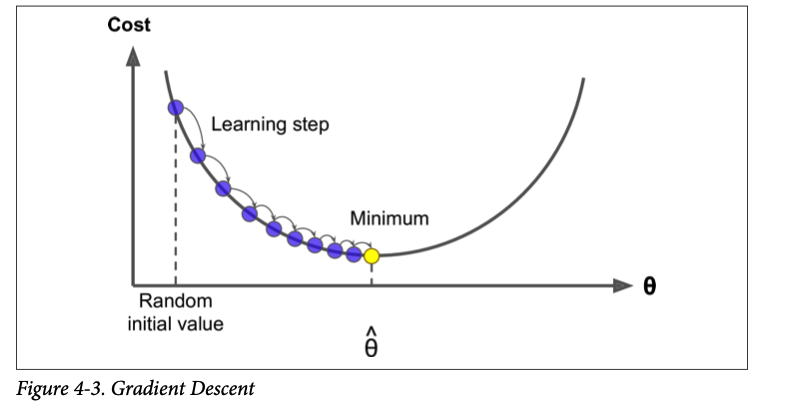

An important parameter is the size of the step or _learning rate_ hyperparameter.

When using Gradient Descent you should make sure all features have a similar scale or else it may take much longer to converge. 

Fortunately, cost function is always convex for linear regression so we can almost always get to the gloabal min.




Next, to gradient descent, we need to compute the gradient of the cost function for each of the theta's (all the feature vars). ie. How much will the cost function change if we change each theta just a little bit? --this is called partial derivatives. Using the moutnain example, it's like asking, "what is the slope of the mountain under my feet if I face east, then south, then west, then north --4 dimensions, all partial part of the whole cost function.

Instead of computing these partial derivatives individually, yoiu can compute all them at once using the this equation. 
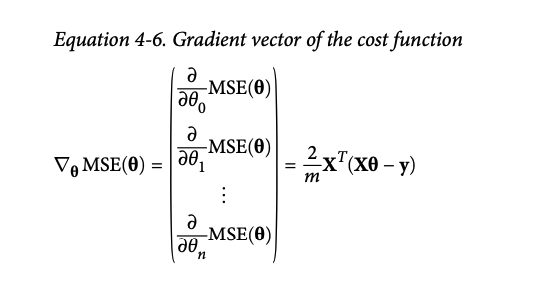

The algo is called _Batch Gradient Descent_ because you use the whole batch of training data (the full training set X) at every _step_ down the mountain --actually, full gradient descent would be a more apt name.

As a consequence, this is a very slow process for very large datasets --but we'll see much faster Gradient Descent algos shortly. Again, training a Linear Regression Model using gradient descent is much faster than using Normal or equation or SVD decomposition when there are hundreds of thousands of features.

Learning rate of gradient descent --looking at the steps. 

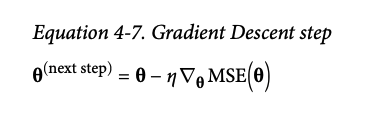

Let's look at a quick implementation of this algo:

In [47]:
eta = 0.1 # learning rate
n_iterations = 100
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [48]:
# Wasn't too hard! Now let's look at the resulting theta. 

theta

array([[3.94593559],
       [3.0647017 ]])

Cool! That is exactly what we got for using the normal equation! But what if we tweaked the learning rate eta? 

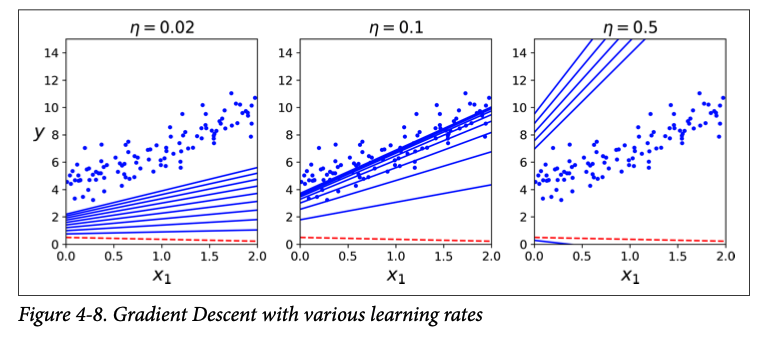

left: learning rate to low
right learing rate to high 

You can use _grid search_ to find a good learning rate. 

## Stochasitc Gradient Descent

The main problem with Batch Gradient Descent is that it uses the whle training set to compute the gradient at every step --making it really slow. 

At the opposite extreme, you've got _Stochastic Gradient Descent_ which just picks a random instance in the training set at every step and computes the gradient based on only that single instance. 

The trade-off is that it converges on the minimum at a much faster rate, but can the cost function can often bounce up and down. Only when the algo stops are the final parameter values good, but not necessarily optimal. 

When the cost function is very irregular --bouncing around-- this can actualy help the algo jump out of a local minima so stoch gradient descent has a better chance of finding the global min than batch in these scenarios. 

One solution is to exploit only the good from stoch is to gradually reduce the learning rate. So you want to start out large, then get smaller.

The function that determines the learning rate at each iteration is called the _learning schedule_. 

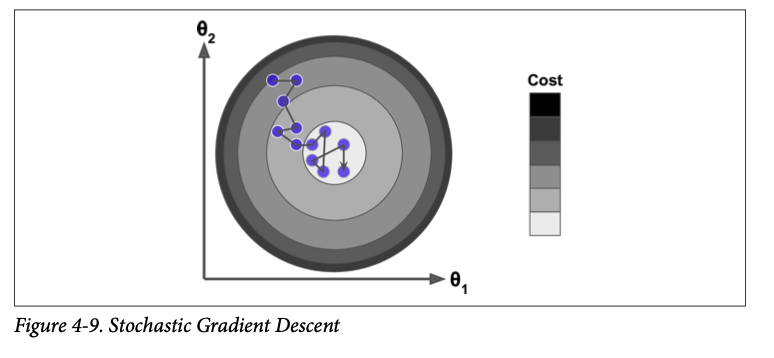


In [49]:
# This code implements Stoch gradient descent using 
# --a simple learning schedule

n_epochs = 50
t0, t1 = 5, 50 # Learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
# By convention we itnerate by m iterations; each round is called an epoch 
# While the Batch Gradient Descent code iterated 1000x thru the whole training set
# This training set only goes thru whole set 50x and reaches pretty good solution.

theta


array([[3.94002288],
       [3.04369346]])

This image shows the first 20 steps of trainig --notice how irregular the steps are!
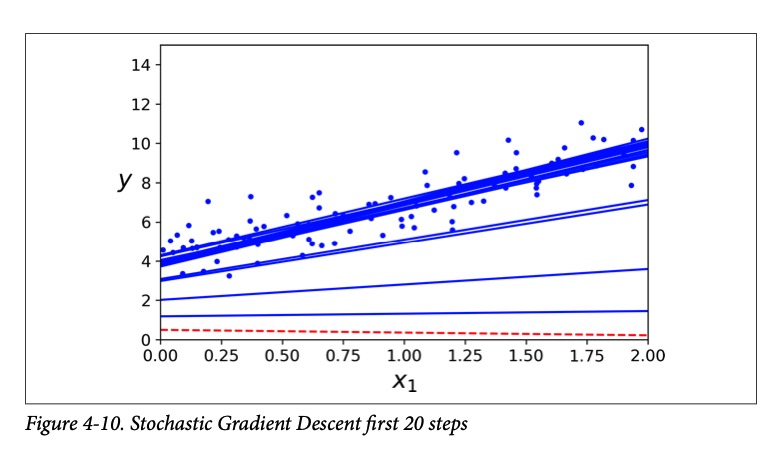

In [60]:
# Using stoch gradient descent (SGD) using Scikit-Learn

from sklearn.linear_model import SGDRegressor 
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1) 
sgd_reg.fit(X, y.ravel())

# tol means until the loss drops by less than 1e-3
# eta means the learning rate


SGDRegressor(eta0=0.1, penalty=None)

In [61]:
# Once again, you'll get a solution close to the one for Normal Equation
sgd_reg.intercept_, sgd_reg.coef_

(array([3.84944116]), array([2.9899042]))

## Mini-batch Gradient Descent 

The third and final gradient descent algo we look at is a hybrid of batch and stoch called mini-batch gradient descent. 

Instead of copmuting the gradients based on the full trainiing set (like in batch) or based on just one instance (SGD), mini-batch computes the gradeints on small random sets of instances called mini-batches. 

It is less erratic than SGD and faster than batch GD. 

See visual below for how each of the three GD methods coverge.

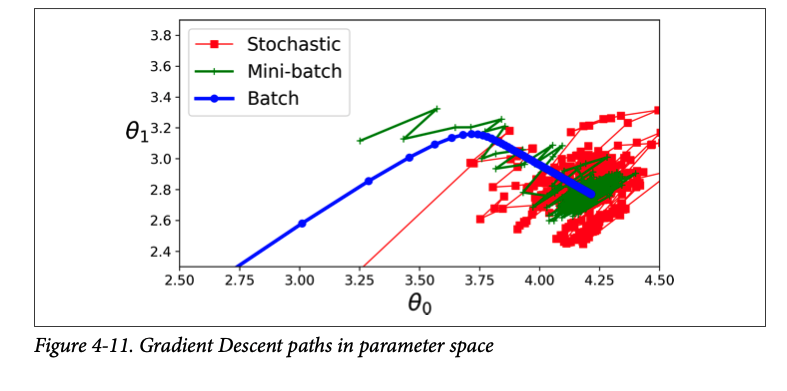

The table below is a good summary of GD techniques and trade-offs:
note: remember that in mxn matrix, m = number of instances/rows ; n = number of features/attributes;

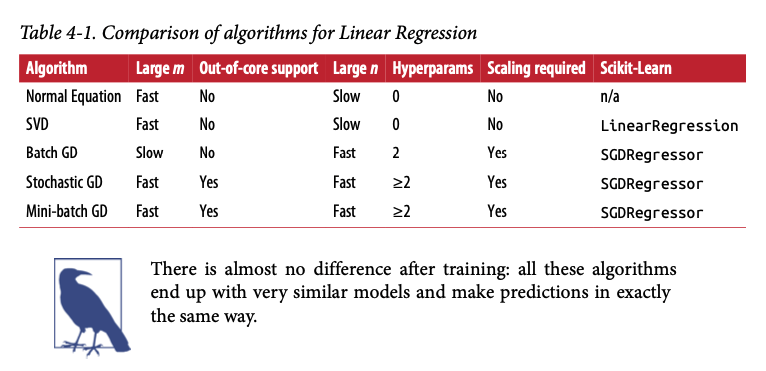

## Polynomial Regression

When we have data that more complex than a simple staright line, we could still use a linear model to fit non-linear data. This is called polynomial regression. 

In the example below, we will generate some non-linear data based on a quadratic equation. 
note: Normal eq can only perform Linear Regression, while Gradient Descent algos can be used to train many other types of models. 

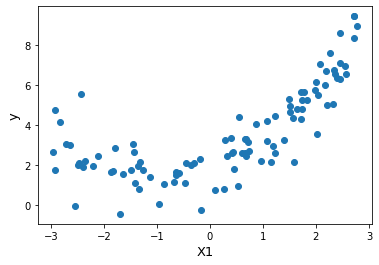

In [68]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)
plt.xlabel("X1", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.scatter(X,y)
plt.show()


We see that a straight line wouldn't fit this data properly.Let's use SK's polynomialfeatures classs to transform our training data, adding the sq of each features (2nd degree polynomials) in the set as new features. 

In [70]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]


array([1.72709732])

In [72]:
X_poly[0]

array([1.72709732, 2.98286514])

X_poly now contains the OG features of X pluys. the square of this features in its array. Now you can fit a lin regression model to this extended training data. 

In [85]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.81503938]), array([[0.93922543, 0.50127247]]))

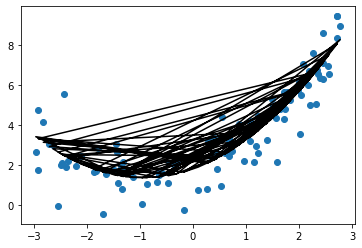

In [97]:
plt.scatter(X, y)
plt.plot(X,lin_reg.predict(X_poly), color = "k")


0.5x<sup>2</sup> + 0.94x + 1.82 is a good prediction by our model compared to the actual equation:
0.5x<sup>2</sup> + 1.0x + 2.0 + Gaussian noise.  

Note: when there are multiple features, Polynomial Regression is able to find relationships btw features (something that linear reg cannot do). 

PolynomialFeatures adds all combos of features up to a given degree (e.g., if there were two features a and b, PolynomialFeatures with degree=3 would not only add the features a2, a3, b2, and b3, but also the combinations ab, a2b, and ab2.)

## Learning Curves 

So how can you tell if you model is overfitted or underfitted? 

There are 2 methods: 

1. In Ch2 we talked about using cross-validation by looking at performance of on training data compared to a validation set. We saw that if the model performed well on training data but generalized poorly according to cross-validation metrics, the model is overfitted. If the model performs poorly on both, then it is undefitted. This is one way to tell if model is too simple or too complex. 

2. Another way is too look at _learning curves_: these are plots of mdoel's performance on the training set and the validation set as a fucntion of training set size. To generate these plots, just train the model several times on different sized subsets of the training set. (see code below)

In [105]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y , test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")
    

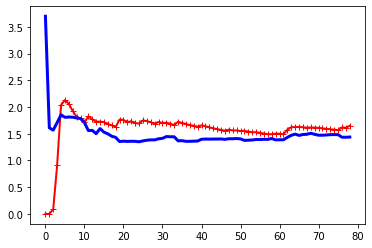

In [106]:
# Let's look at learning cureves of the plain klinear regression model (ie. straight line)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Here is the book example of the same graph (w/ labels):
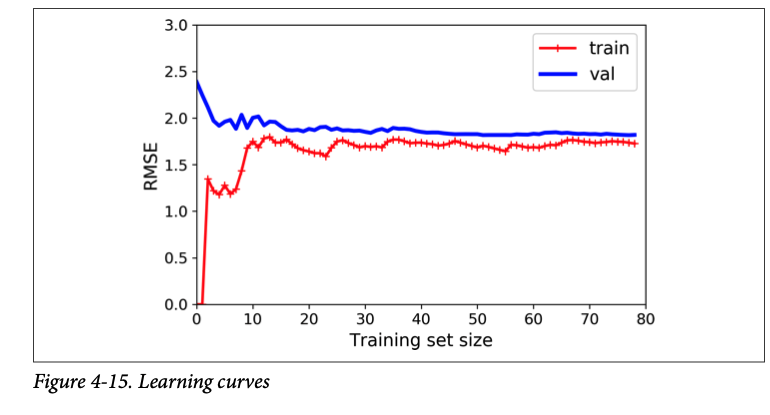

Intitially, the model validation set error is very high because with only a few training instances, the model is incapable of generalizing properly. As new instances are added to the training set, the error decreases, but quickly plateaus. The plateauing of both of the curves is a sign that this is an underfitted model, since a larger data set should be improving the model. Hence, if you model is underfitted adding more trainiing data will not help you --what you need is a more complex model. 

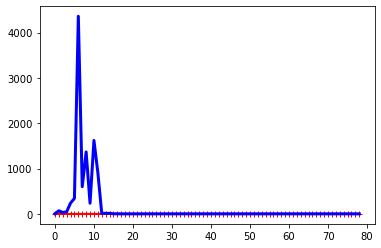

In [109]:
# Now let's look at learning curves for a 10th degree polynomial model on the same data. 

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)), 
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

Here the same image from the book:

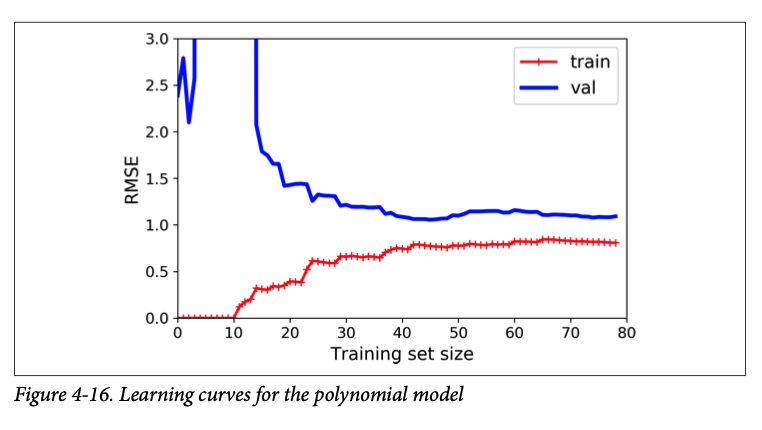

There are 2 important difference in this graph compared to the underfitted one:
1. the error fo the training data is much lower. 
2. There is a gap btw the two curves. This meansn the model is performs significantly better on the training data than the validation set --a hallmark of overfitting. However, if you use a much larger training set, the two curves would continue to get closer. 

Note: One way to improve an overfitting model is to feed it to more training data until the validation error reaches the training error. 

### The Bias/Variance Tradeoff

_Bias_ --wrong assumptions that creates generalization errors. Maps unto underfitting. 

_Variance_ --Model's excessive sensitivity to small variations in training data. Model w/ many degrees of freedom (polynomial) is likleyh to have high var, resulting in overfitting. 

_irreducible error_ --this is due to noisiness of the data itself. Only way to reduce it is to clearn the data up (e.g., remove outliers ect). 

Increasing complexity will likleiy increase its variance and reduce bias --and the inverse relationship is true too. Hence, there is a trade-off btw bias and variance. 


## Regularized Linear Models

A good way to reduce overfitting is to add contraints or regularize the model. the fewer df's it has, the harder it will be to overfit the data. E.g., to regularize a polynomial model, you can reduce the # of polynomial degrees. 

For a linear model, you can regularize by contraining the weights of the models. There are three ways to do this as we will see now:

### 1. Ridgid Regression 

During the training aspect of the model, a _regularization term_ equation is used to mimize the magnitude of the weights for each feature variable. BUT, once the model is trained, you want to evaluate the model's performance using the unregularized preformance measure --this is very important!

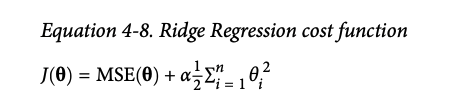

The hyperparameter alpha controls how much you want to regularize. If alpha = 0, then the ridge regression is effecively linear --no change. If the alpha is very large, then all the weights end up very close to zero and the result is a flat line going throught the data's mean. 

note: the biased term (y-int) is not regularized. 
note: it is important to scale the data (e.g. use StandardScaler) before performing Ridge Regression since it is sensetive to input feartures.

### 2. Lasso Regression 
(will be discussed after)

### 3. Elastic Net
(will be discussed after)

On the left: linear fitting model w/ differnt regularization parameters. 
on the right: polynomial fitting model w/ differnt regularization parameters. 

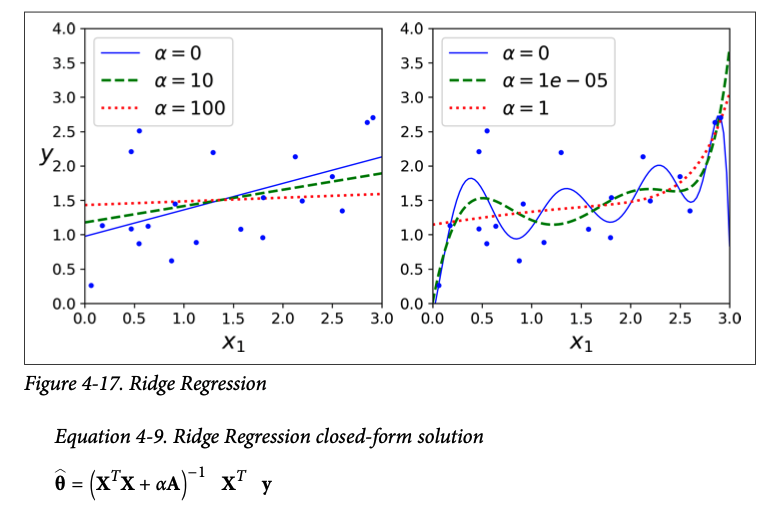

Below is how to perform Ridge Regression w/ Scikit-Learn using closed-form solution. 

In [110]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])


array([[4.71044128]])

In [111]:
# And using Stochastic Gradient Descent

sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


array([4.68466117])

Penalty hyperparameter sets the type of regularization term to use. Specifying "l2" means that you want to SGd to add regularization term to thue cost function that is half the square of the l<sub>2</sub> norm of the weight vector --i.e., the Ridige Regression.

## Lasso Regression

the concept here is similar --decrease the mag of the weight-- but for lasso, instead of halving the valiue, we use l=l<sub>1</sub> norm of the weight vecotr instead (peak the eq below). 

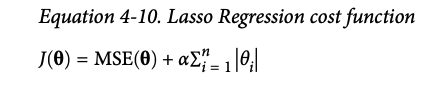

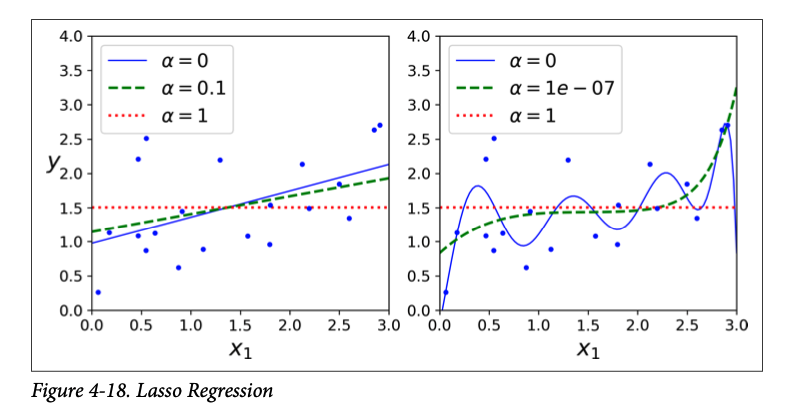

You'll notice that a key feature of Lasso Regression is that it tends to completely elminate the weights of the least important feaures (sets them to zero). In other words, Lasso Reg automatically performs fearture selection aknd outputs a _sparse model_ --ie..with few non-zero feaures weights

Below is a short Sklearning e.g. of using Lasso

In [112]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([4.67257708])

## Elastic Net

A in-btw of Lasso and Ridge. when r = 0, elastic net is equivalent to ridge; when r = 1, elastic equailvalent to Lasso. 

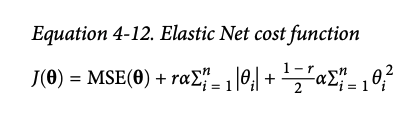

So, the question we care about: when should you use each type of method???

First, ridge is a good default. But if you suspect only a few features are important, you should go with either lasso or elastic --they reduce the weight of negligible features. In general elastic is perferred to lasso, since it is less erratic. 

Here is an exmaple of elastic below: 
note: l<sub>1</sub> corresponds to the r value. 

In [113]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])


array([4.67493043])

## Early stopping regularization

A way to regularize iterative learning algos like GD which is simply to stop training _early_ or right when the the validation error reaches a minimum. Geoffrey Hinton calls it a "beautiful free lunch". 


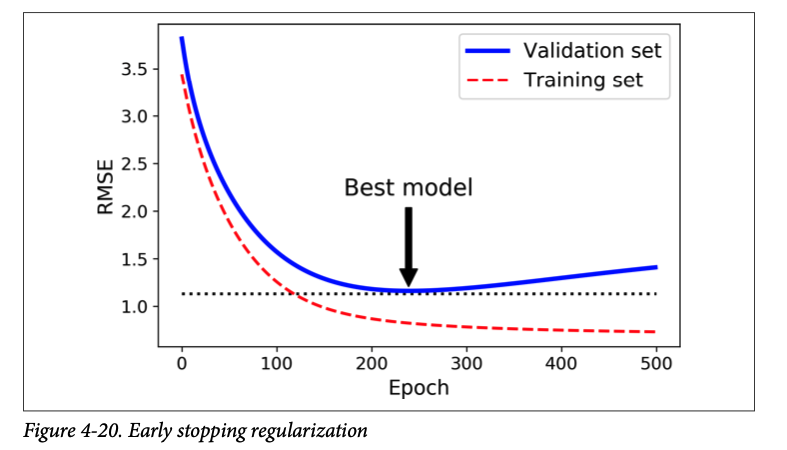

Here is an implementation of the early stopping method: 

In [115]:
from sklearn.base import clone

# Prepare the data
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True,
                      penalty = None, learning_rate = "constant", eta0 = 0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # Continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error: 
        minimum_val_error = val_error
        best_epoch = epoch 
        best_model = clone(sgd_reg)

# Note: the warm_start = True just whens that when the fit() method is called, it just continues training where it left off
# --insteaad of starting from scratch. 

NameError: name 'StandardScaler' is not defined

## Logistic Regression 

Some regression algos can be used for classification purposes too!

Logistic Regression (i.e. _logit regression_) is commonly used to estimate the prob of a particular class. (e.g., what is the prob that this email is spam?) --if the estimated prob is > 50% the model predicts the instance belongs to the class and vice versa if < 50%; hence, a binary classifier!

Logistic regression works similar to a linear regression --weighted sum of the input features-- except instead of outputting the direct result like linear regression, it outputs the logistic of the result.

the logistic is a sigmoid function (S-shaped) that outputs a number btw 0 and 1. 
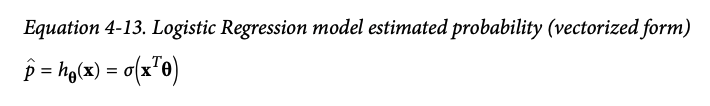
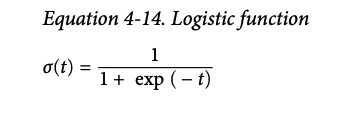
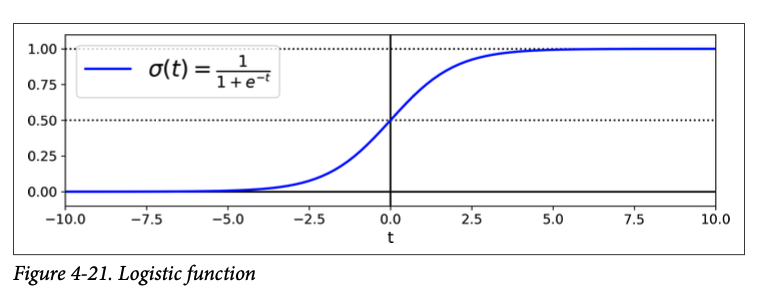

Once the Logistic Regression model has estimated the prob that the instance x belongs to the positive class, it can easily predict the y-value model prediction.

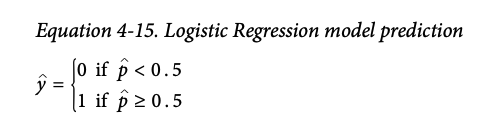


## Training & Cost Function

Now you know how log regression model estimates prob and makes predicitions. But how do we train the model??

The objective of training is to set the parameter vector (theta) so that model estimates high prob for positive instances (y=1) and small prob for negative instances (y=0). This idea is captured by the cost function for a single training isntance x. 

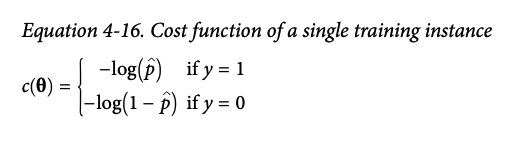

The cost function makes sense because -log(t) gets very large when t appraoches 0, so the cost will be large if the model estimates a prob close to 0 for a psotive instance. VV when t gets very small. This is precisely what we want. 


the cost function over the whole training set is just the avg cost over all training instances. This can easily be written in a single expression --_log loss_:
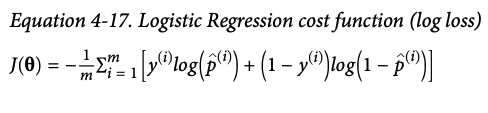

the thing that isn't great is that there is no closed-form equation to copmute the theta (ie. there is no Normal Eq equivalent). The upside is that the cost function is convex so gradient descent will converge on the global minimum. 

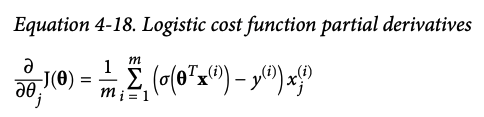

this eq looks like the one used for linear reg. Similarly, once you have the gradient vector containing all the partial derivatives, you can use it in the batch gradeint descent algo. 

THAT IS IT!!! YOU NOW KNOW HOW TO TRAIN A LOGISTIC REGRESSION MODEL. 

For stoch GD you would just take one instance at a time, and for mini-batch GD you would use a mini-batch at a time.

## Decision Boundaries

We'll be using the famous sepal dataset to illustrate logistic regression. Short description: dataset contains sepal and petal lenght and width of 150 iris flowers of three different species. 

Let's start by trying to build a classifier that detects Iris-Virginica type based only on the petal width attribute. 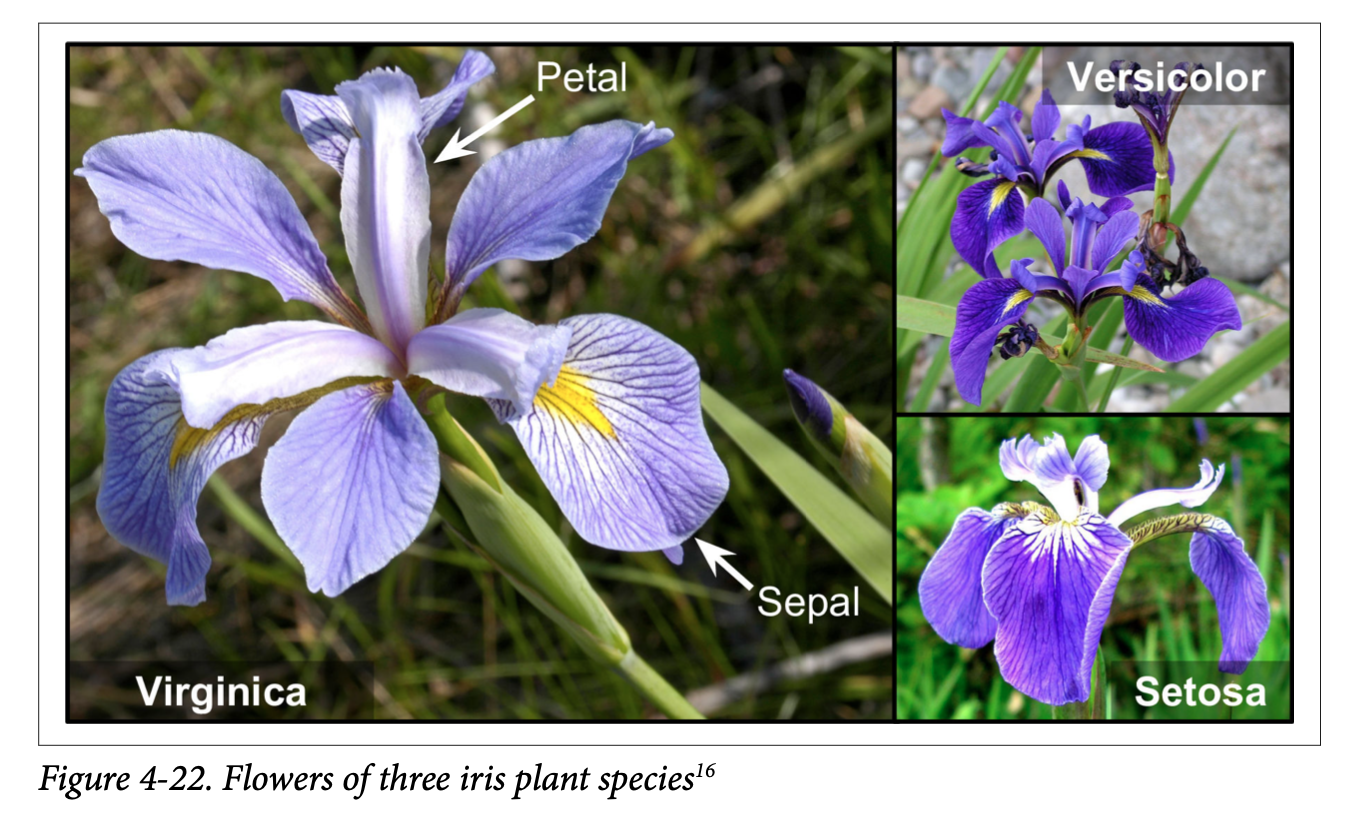

In [120]:
# Load the data
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, 3:] # Petal Width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris = Virginica, else 0

In [121]:
# Now let's train the Logistic Regression Model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

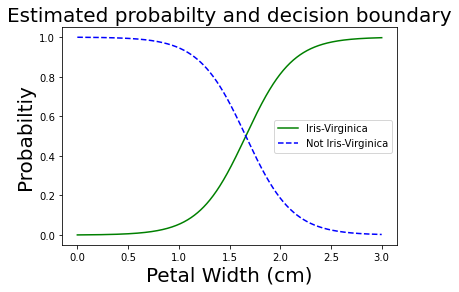

In [131]:
# Let's look at the model's estimated probabilities for flowers w/ petal widths varying from 0 to 3cm.

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.xlabel("Petal Width (cm)", fontsize = 20)
plt.ylabel("Probabiltiy", fontsize = 20)
plt.title("Estimated probabilty and decision boundary", fontsize = 20)
plt.plot(X_new, y_proba[:, 1], "g-", label = "Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label = "Not Iris-Virginica")
plt.legend()
# + add more Matplotlib code to make the image look pretty!


Based on the image you can see that the decision boundary for classifying is around 1.5 cm. 

If you use predict() method rather than predict_proba() method, the classifier will predict whatever class is more likely. On the other hand, if you do predict_proba(), you will get the exact probs. 


In [132]:
# E.g. of predicting two values flanking the decision boundary of 1.6cm

log_reg.predict([[1.7],[1.5]])


array([1, 0])

Once trained, the log classifer can make predictions of class based on two attributes. See graph below: 
note: each of the lines show different level of cofidence/probabilities --the dashed line is the 50% mark. 

Just like other linear models, log regression models can be regularized using l<sub>1</sub> or l<sub>2</sub> penalties. Scikit-Learn actually adds an l<sub>2</sub> penalty by default. 
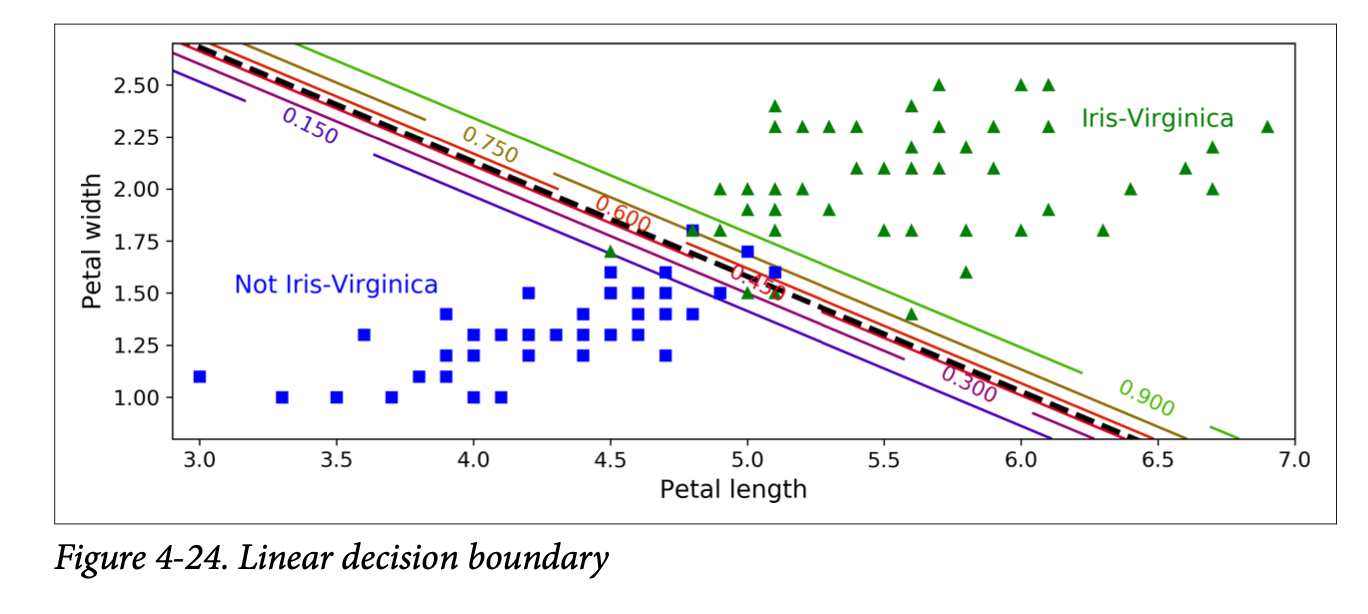

## Softmax Regression 

The logistic regression can be generalized to support multiple classes without having to train and combine multiple binary classifers (very direct, simple way to do this). This is called _softmax regression_

What this means practically is that if you have a dataset with a lot of attributes and different potential classifications, you could build a classifer using softmax regression that takes in multiple attributes as inputs, and will output one of the classes that has the highest probability (log_reg.predict_proba) or just the class (log_reg.predict). But, softmax can't give you multiple outputs, just the one most likely class or proba of it being that class. 

The inutition is pretty simple: when given an instance x, the softmax regression model first computes a score s<sub>k</sub>(x) for each class k, then estmiates the prob of each class by applying the _softmax function_ to the scores.  

the eq to calculate the score for each class is very similar to that for linear regression prediction:


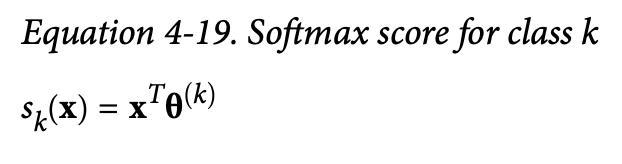

note: each calss has its own dedicated theta parameter vector. All these vectores are typically stoed as rows in a paraemter matrix omega. 

Once computed all the scores of each class for the instance x, you can estimate the prob that the instance belongs to the class k by running the scores through the softmax fucntion. 
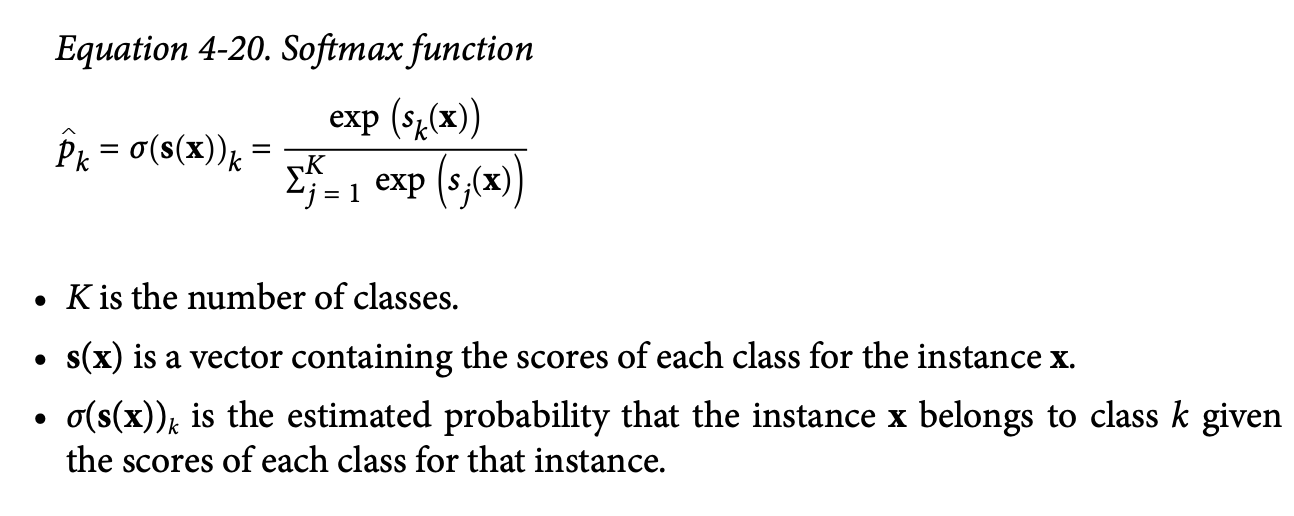

just like the log regression classifer, the softmax predicts the class with the highest estimated prob (class with the highest score) as shown below: 
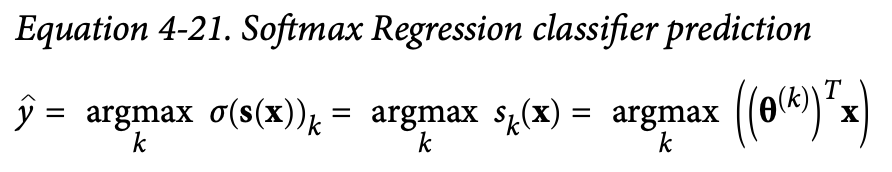

The argmax operator returns value of var that maximizes the function. In eq, it returns value of k that maximizes the estimated prob of sigma.

Now that we know how the model estimates probs/makes predictions, let's look at training. The objective of training is to have a model that estimates the high prob for the target class (and low prob for other classes). Minimizing the cost function called the _cross entropy_ would realize our objective by penalizing hte model when it estimates a low prob for the target class. 

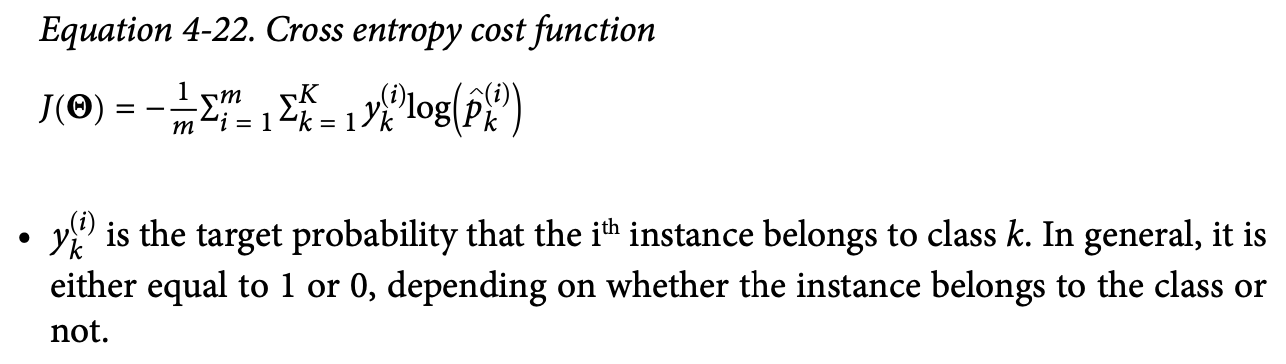

notice that when there are just 2 classes, the eq is the same as the log regression cost function. 

The gradient vectore for this cost function is shown here: 
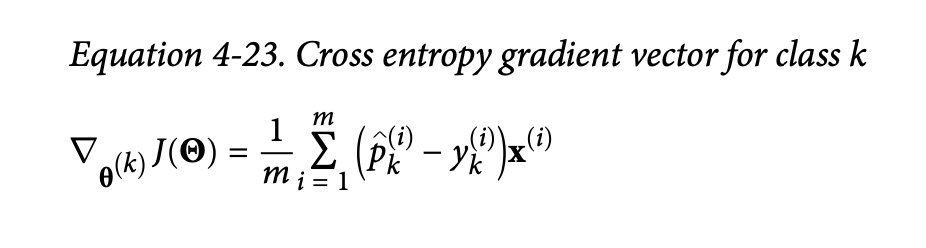
You can now compute the graident vector for each of the classes, then use any optimization algo like gradeint descent to find the parameter matrix (omega) that minimizes the cost function. 

Let's use Softmax regression to classify the iris flower into all three classes. ScikitLearn has by default uses the one-vs-all when you train it on more than two classes. So, we are going to have to manually set the multi_class hyperparamter to "multinomial" to switch to softmax. You also got to specify a solver that supports softmax regression --"lbfs". l<sub>2</sub> is regularization is applied by default but can be controlled with hyperparameter C. 

In [133]:
X  = iris["data"][:, (2,3)] # Specifies attributes -> petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [135]:
# Let's make predict class of a flower with 5cm petal length and 2cm width!

softmax_reg.predict([[5,2]])

array([2])

In [136]:
# Okay, so we see that an output of class = 2 corresponds with the Iris Virginica identity!
# Let's now try to find out the exact proba that our model estmimates for each of the three classes!

softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

class 0 prob (Setosa) = pretty much zero
class 1 prob (Versicolor)= ~5%
class 2 prob (Verginica) = ~95%

These classifications are based on our inputs of 5cm petal length and 2cm petal width!
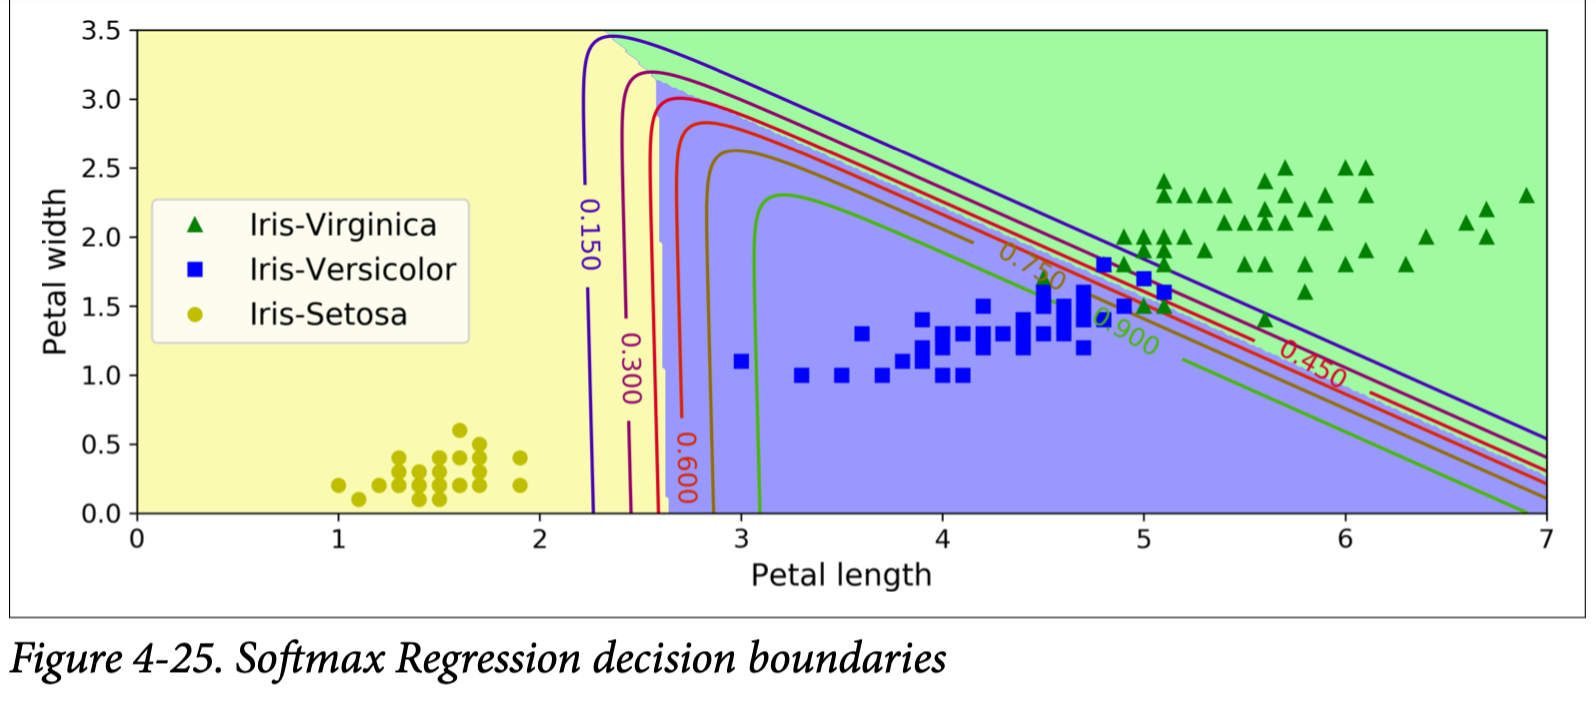
Ultimately, with Softmax regression we can make a visual like this.

## Exersizes 
(see page 154)